In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import uproot3
import h5py
import ROOT as rt
from tqdm import tqdm as tqdm
import copy
import math

Welcome to JupyROOT 6.26/10


# Preliminary cuts to skim data !!!
* Acceptance on ANTI0, STRAWs, NewCHOD, CHOD, LAV12, LKr, MUVs
* Events with minimum 2 downstream tracks
* Minimum 3 STRAW chambers hits
* $p_{tracks}$ > 1 GeV
* $Time_{tracks}\ =\ CHOD\ time\ exist\ ?\ Time_{CHOD}\ :\ Time_{NewCHOD}$ 
* $\Delta T[Tracks,\ Trigger]$ < 5ns

# Read skimmed data

In [2]:
dataS = 'diTracks_KsLambda_BD2021'
pathS = '/Volumes/Buio/na62/data/diTracks_KsLambda/'
version = '_acceptance'#'_skimmed'

In [3]:
pd_read = pd.read_hdf(pathS + dataS + version + '.h5')

In [4]:
pd_read.head()

,RunID,BurstID,EventID,Trigger_Q1,Trigger_H2,Trigger_LKr,TrigSlotQ1_i0,TrigSlotH2_i0,TrigSlotLKr_i0,TrigSlotQ1_i1,...,Track2_BremsClusterDist,Track2_hitType,Track2_SeedEnergy,Track2_HighestNeighbourEnergy,Track2_LKrHitPosition.fX,Track2_LKrHitPosition.fY,Track2_LKrHitPosition.fZ,Track2_LKrHitHighestEPosition.fX,Track2_LKrHitHighestEPosition.fY,Track2_LKrHitHighestEPosition.fZ
entry,,,,,,,,,,,,,,,,,,,,,
1,11061,84,28293,True,True,True,False,False,False,True,...,25.604420,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11061,84,29954,True,True,False,False,False,False,True,...,25.604420,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,11061,86,45708,True,True,False,False,False,False,True,...,137.330427,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,11061,86,45972,True,True,False,False,False,False,True,...,137.330427,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,11061,86,46791,True,True,False,False,False,False,True,...,137.330427,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
len(pd_read)

454389

# Selections !!!
* Events passed L0Calo & H2
* $\chi^{2}_{tracks}$ < 20
* $\chi^{2}_{vertex}$ <30
* Two tracks have opposite charges

In [6]:
Trigger_Selection = (pd_read['Trigger_LKr']==True) & (pd_read['Trigger_H2']==True)
Baseline_Selection = (pd_read['Track1_chi2']<20) & (pd_read['Track2_chi2']<20) & (pd_read['Vertex_Chi2']<30)
#Baseline_Selection = Baseline_Selection & (pd_read['Track1_MUV1AssociationExists']==True) & (pd_read['Track1_MUV2AssociationExists']==True)
#Baseline_Selection = Baseline_Selection & (pd_read['Track2_MUV1AssociationExists']==True) & (pd_read['Track2_MUV2AssociationExists']==True)

In [7]:
#data_skimmed = pd_read[Trigger_Selection & Detector_acceptance_trk1 & Detector_acceptance_trk2 & Baseline_Selection]
data_skimmed = pd_read[Trigger_Selection & Baseline_Selection]

In [8]:
len(data_skimmed)

71051

In [9]:
charge_TrkTrk = (data_skimmed['Track1_charge']) + (data_skimmed['Track2_charge'])
data_os = data_skimmed[charge_TrkTrk==0]

In [10]:
len(data_os)

28665

# $E_{LKr}/p\ vs\ p$

/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_43485/3295189676.py:5: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.hist2d(data_os['Track1_p'], data_os['Track1_lkrEoP'],bins=100,range=[[0,400],[0,1.2]],norm=mcolors.LogNorm(),**cmap,label="All")


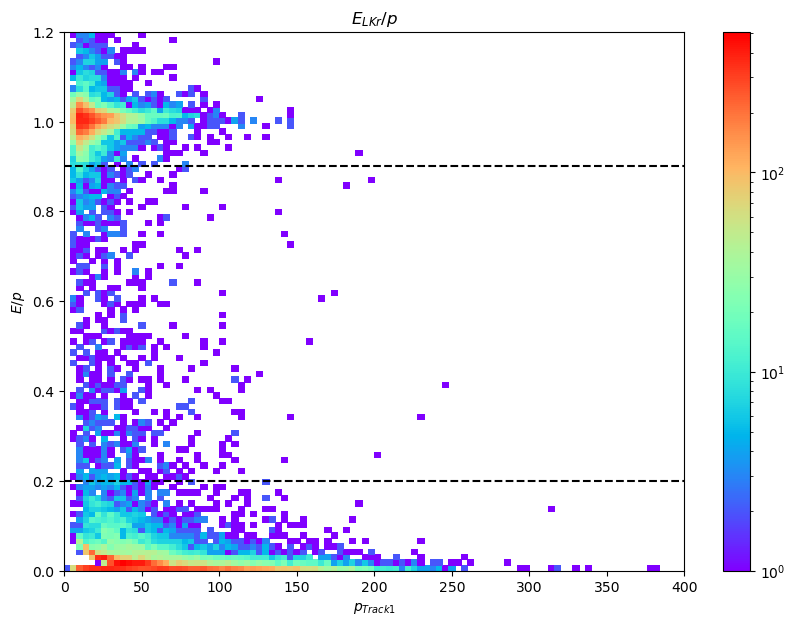

In [11]:
plt.figure(figsize=(10,7))
cmap = copy.copy(plt.cm.get_cmap('rainbow'))
cmap.set_under('white')
cmap = dict(cmap=cmap, vmin=1)
plt.hist2d(data_os['Track1_p'], data_os['Track1_lkrEoP'],bins=100,range=[[0,400],[0,1.2]],norm=mcolors.LogNorm(),**cmap,label="All")
plt.title("$E_{LKr}/p$")
plt.xlabel('$p_{Track1}$')
plt.ylabel('$E/p$')
plt.colorbar()
plt.axhline(y=0.9, color='black', linestyle='--')
plt.axhline(y=0.2, color='black', linestyle='--')

/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_43485/3198448083.py:5: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.hist2d(data_os['Track2_p'], data_os['Track2_lkrEoP'],bins=100,range=[[0,400],[0,1.2]],label="$N_{tracks}$",norm=mcolors.LogNorm(),**cmap)


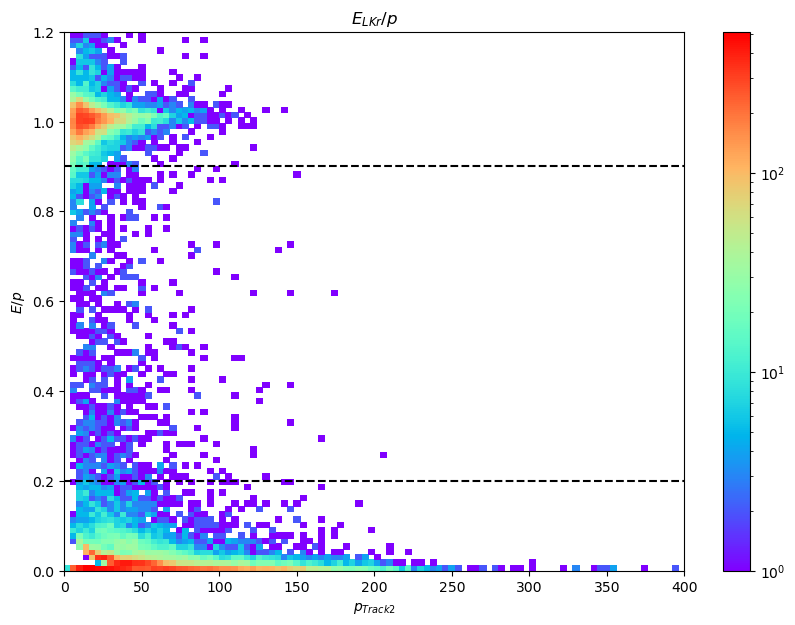

In [12]:
plt.figure(figsize=(10,7))
cmap = copy.copy(plt.cm.get_cmap('rainbow'))
cmap.set_under('white')
cmap = dict(cmap=cmap, vmin=1)
plt.hist2d(data_os['Track2_p'], data_os['Track2_lkrEoP'],bins=100,range=[[0,400],[0,1.2]],label="$N_{tracks}$",norm=mcolors.LogNorm(),**cmap)
plt.title("$E_{LKr}/p$")
plt.xlabel('$p_{Track2}$')
plt.ylabel('$E/p$')
plt.colorbar()
plt.axhline(y=0.9, color='black', linestyle='--')
plt.axhline(y=0.2, color='black', linestyle='--')

In [13]:
piMass = 0.13957039
data_os['Track1_Energy_BM'] = (piMass**2 + data_os['Track1_p']**2)**(1/2)
data_os['Track2_Energy_BM'] = (piMass**2 + data_os['Track2_p']**2)**(1/2)

/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_43485/831091150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_os['Track1_Energy_BM'] = (piMass**2 + data_os['Track1_p']**2)**(1/2)
/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_43485/831091150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_os['Track2_Energy_BM'] = (piMass**2 + data_os['Track2_p']**2)**(1/2)


In [14]:
data_os[['Track1_Energy_BM','Track2_Energy_BM','Track1_p','Track2_p']][:5]

,Track1_Energy_BM,Track2_Energy_BM,Track1_p,Track2_p
entry,,,,
1,67.631615,68.493656,67.631471,68.493514
31,47.483588,15.490168,47.483383,15.489539
97,13.701784,32.643668,13.701073,32.643370
107,60.719252,17.952502,60.719091,17.951959
120,47.776804,20.707594,47.776600,20.707124


In [15]:
pi1_p4, pi2_p4, dipi_p4 = rt.TLorentzVector(), rt.TLorentzVector(), rt.TLorentzVector()

In [16]:
ddd = data_os[['Track1_pX_BeforeMagnet','Track1_pY_BeforeMagnet','Track1_pZ_BeforeMagnet','Track1_Energy_BM',
               'Track2_pX_BeforeMagnet','Track2_pY_BeforeMagnet','Track2_pZ_BeforeMagnet','Track2_Energy_BM']]
dipi_M = []
dipi_p = []
for i, p4 in enumerate(ddd.to_numpy()):
    pi1_p4.SetPxPyPzE(p4[0], p4[1], p4[2], p4[3])
    pi2_p4.SetPxPyPzE(p4[4], p4[5], p4[6], p4[7])
    dipi_p4 = pi1_p4 + pi2_p4
    dipi_M.append(dipi_p4.M())
    dipi_p.append(dipi_p4.P())
    #data_os.loc[i, 'dipi_M'] = dipi_p4.M()
    #print(dipi_p4.M())
    #if i == 10: break

data_os.loc[:,'dipi_M'] = dipi_M
data_os.loc[:,'dipi_p'] = dipi_p
#print(data_os['dipi_M'])

/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_43485/730138415.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_os.loc[:,'dipi_M'] = dipi_M
/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_43485/730138415.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_os.loc[:,'dipi_p'] = dipi_p


In [17]:
data_os['dipi_p'][:5]

entry
1      136.124943
31      62.972920
97      46.344439
107     78.671048
120     68.483722
Name: dipi_p, dtype: float64

# Two tracks invariant mass

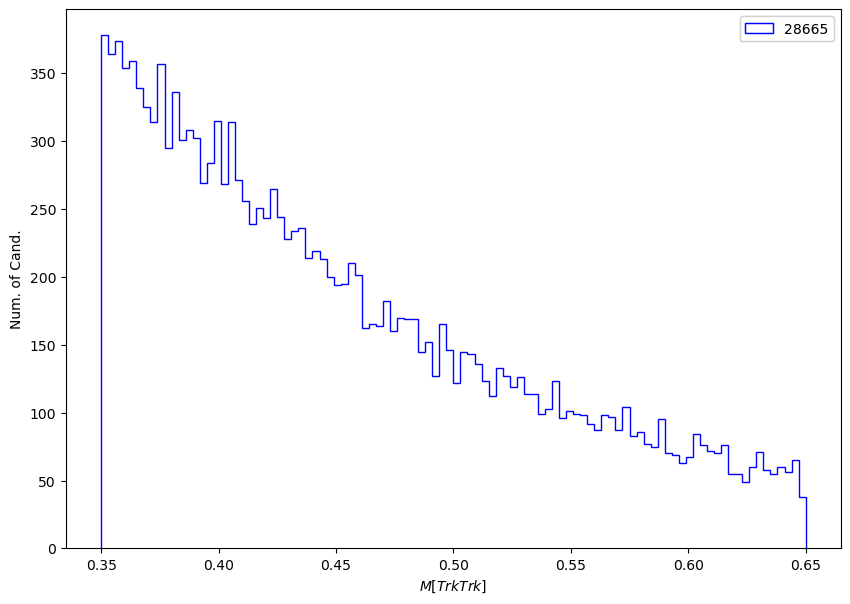

In [18]:
plt.figure(figsize=(10,7))
plt.hist(data_os['dipi_M'],range=(0.35,0.65),bins=100,log=False,label="", color='blue', histtype='step')
plt.title("")
plt.xlabel('$M[TrkTrk]$')
plt.ylabel('Num. of Cand.')
npipi = data_os['dipi_M']
npipi = str(len(npipi))
legend1 = plt.legend([npipi],loc=1)
plt.gca().add_artist(legend1)

/var/folders/v0/m2n9p37j619fdss_7fv_5k700000gn/T/ipykernel_43485/2908593434.py:5: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.hist2d(data_os['dipi_M'], data_os['dipi_p'],bins=100,range=[[0.27,0.8],[0,400]],label="$N_{tracks}$",norm=mcolors.LogNorm(),**cmap)


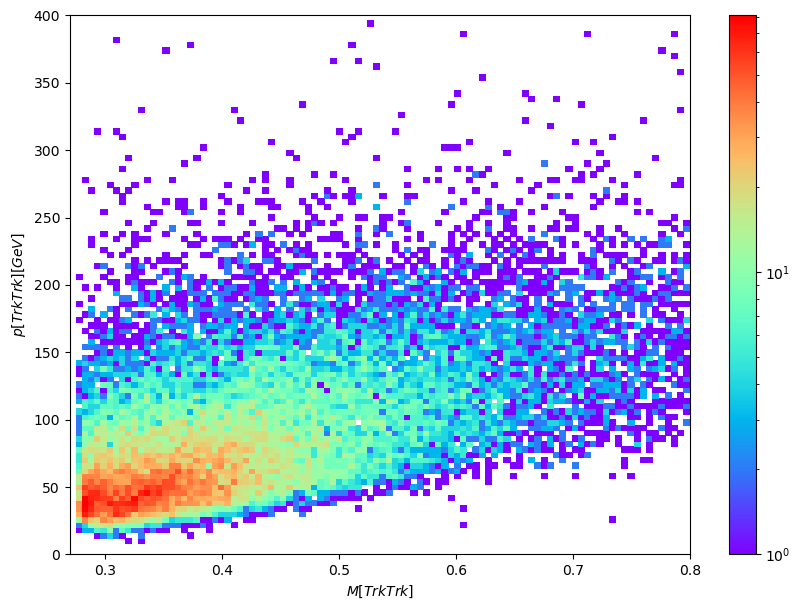

In [19]:
plt.figure(figsize=(10,7))
cmap = copy.copy(plt.cm.get_cmap('rainbow'))
cmap.set_under('white')
cmap = dict(cmap=cmap, vmin=1)
plt.hist2d(data_os['dipi_M'], data_os['dipi_p'],bins=100,range=[[0.27,0.8],[0,400]],label="$N_{tracks}$",norm=mcolors.LogNorm(),**cmap)
plt.title("")
plt.xlabel('$M[TrkTrk]$')
plt.ylabel('$p[TrkTrk][GeV]$')
plt.colorbar()

# Two pion invariant mass - check with $0.2\ <\ E_{LKr}/p\ <\ 0.9$

In [20]:
data_os_pipi = data_os[(data_os['Track1_lkrEoP'] > 0.2) & (data_os['Track1_lkrEoP'] < 0.9)]
data_os_pipi = data_os[(data_os['Track2_lkrEoP'] > 0.2) & (data_os['Track2_lkrEoP'] < 0.9)]

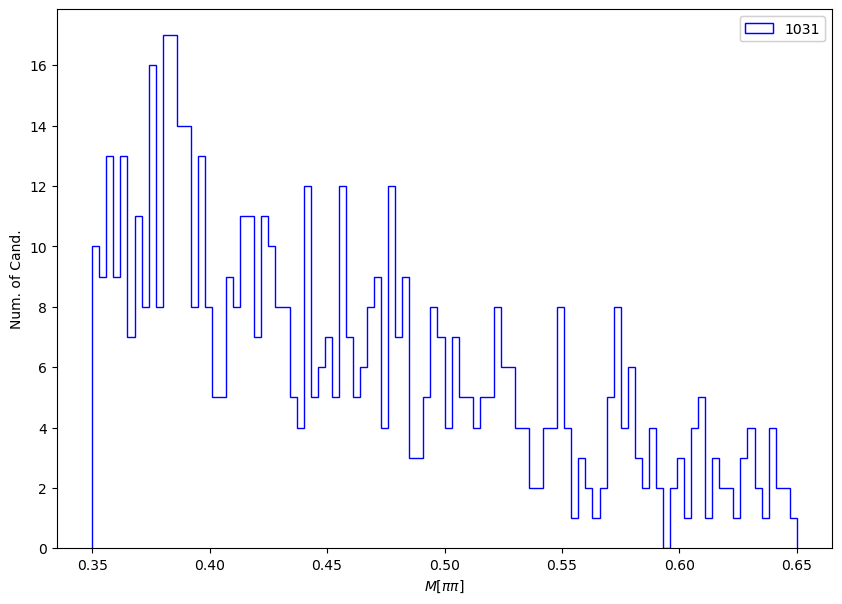

In [21]:
plt.figure(figsize=(10,7))
plt.hist(data_os_pipi['dipi_M'],range=(0.35,0.65),bins=100,log=False, color='blue', histtype='step')
plt.title("")
plt.xlabel('$M[\pi\pi]$')
plt.ylabel('Num. of Cand.')
npipi = data_os_pipi['dipi_M']
npipi = str(len(npipi))
legend1 = plt.legend([npipi],loc=1)
plt.gca().add_artist(legend1)

In [22]:
data_os_pipi[['dipi_M','dipi_p','Vertex_Z']][:5]

,dipi_M,dipi_p,Vertex_Z
entry,,,
5524,0.401216,189.384500,101962.277535
20620,0.285281,89.783548,154464.156689
25547,0.297949,65.264122,185899.670827
27901,0.461661,131.658665,183445.033622
30912,0.447169,75.428757,253819.810709


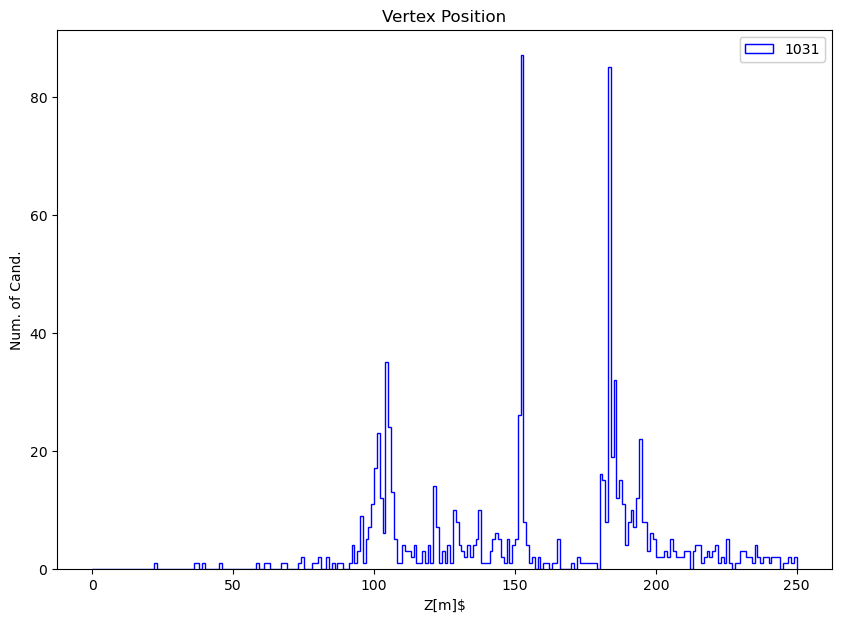

In [23]:
plt.figure(figsize=(10,7))
plt.hist(data_os_pipi['Vertex_Z']*0.001,range=(0,250),bins=250,log=False, color='blue', histtype='step')
plt.title("Vertex Position")
plt.xlabel('Z[m]$')
plt.ylabel('Num. of Cand.')
npipi = data_os_pipi['Vertex_Z']
npipi = str(len(npipi))
legend1 = plt.legend([npipi],loc=1)
plt.gca().add_artist(legend1)

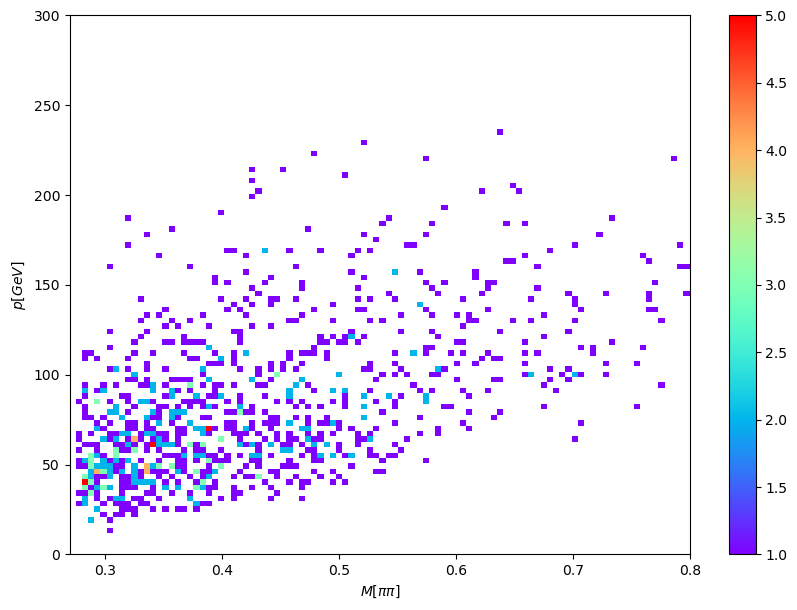

In [24]:
plt.figure(figsize=(10,7))
cmap = copy.copy(plt.cm.get_cmap('rainbow'))
cmap.set_under('white')
cmap = dict(cmap=cmap, vmin=1)
plt.hist2d(data_os_pipi['dipi_M'], data_os_pipi['dipi_p'],bins=100,range=[[0.27,0.8],[0,300]],label="$N_{tracks}$",**cmap)
plt.title("")
plt.xlabel('$M[\pi\pi]$')
plt.ylabel('$p[GeV]$')
plt.colorbar()

# $20m\ <\ Z_{vtx}\ <\ 150m$

In [25]:
data_os_pipi_vtx = data_os_pipi[(data_os_pipi['Vertex_Z']*0.001 > 20) & (data_os_pipi['Vertex_Z']*0.001 < 150)]

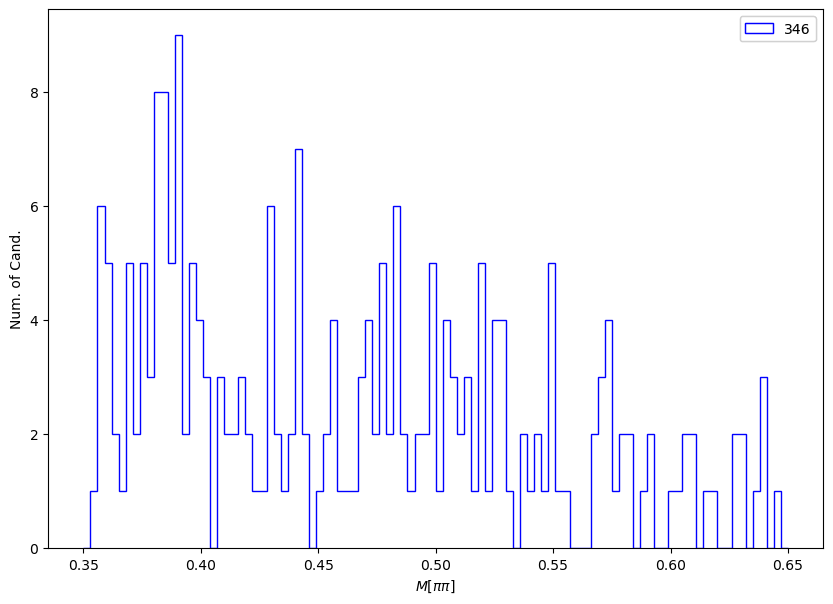

In [26]:
plt.figure(figsize=(10,7))
plt.hist(data_os_pipi_vtx['dipi_M'],range=(0.35,0.65),bins=100,log=False, color='blue', histtype='step')
plt.title("")
plt.xlabel('$M[\pi\pi]$')
plt.ylabel('Num. of Cand.')
npipi = data_os_pipi_vtx['dipi_M']
npipi = str(len(npipi))
legend1 = plt.legend([npipi],loc=1)
plt.gca().add_artist(legend1)

# $100m\ <\ Z_{vtx}\ <\ 150m$

In [27]:
data_os_pipi_vtx_ = data_os_pipi[(data_os_pipi['Vertex_Z']*0.001 > 100) & (data_os_pipi['Vertex_Z']*0.001 < 150)]

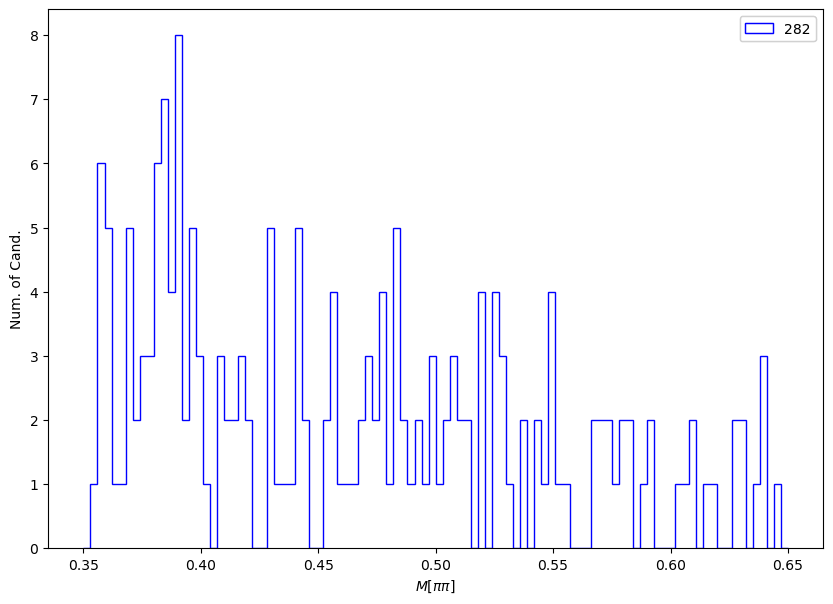

In [28]:
plt.figure(figsize=(10,7))
plt.hist(data_os_pipi_vtx_['dipi_M'],range=(0.35,0.65),bins=100,log=False, color='blue', histtype='step')
plt.title("")
plt.xlabel('$M[\pi\pi]$')
plt.ylabel('Num. of Cand.')
npipi = data_os_pipi_vtx_['dipi_M']
npipi = str(len(npipi))
legend1 = plt.legend([npipi],loc=1)
plt.gca().add_artist(legend1)

# $100m\ <\ Z_{vtx}\ <\ 115m$

In [29]:
data_os_pipi_vtx_C = data_os_pipi[(data_os_pipi['Vertex_Z']*0.001 > 100) & (data_os_pipi['Vertex_Z']*0.001 < 115)]

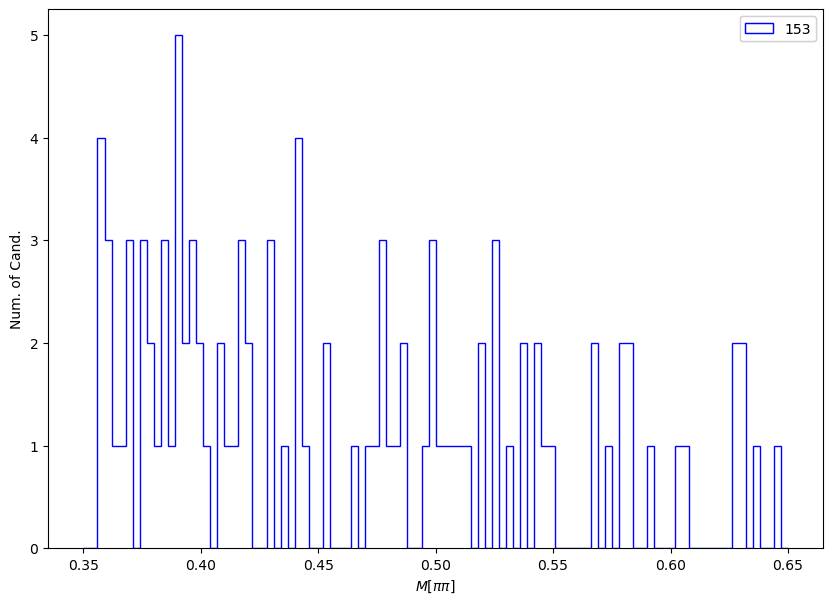

In [30]:
plt.figure(figsize=(10,7))
plt.hist(data_os_pipi_vtx_C['dipi_M'],range=(0.35,0.65),bins=100,log=False, color='blue', histtype='step')
plt.title("")
plt.xlabel('$M[\pi\pi]$')
plt.ylabel('Num. of Cand.')
npipi = data_os_pipi_vtx_C['dipi_M']
npipi = str(len(npipi))
legend1 = plt.legend([npipi],loc=1)
plt.gca().add_artist(legend1)